In [1]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Circle
from skimage import transform
from skimage.io import imread, imshow



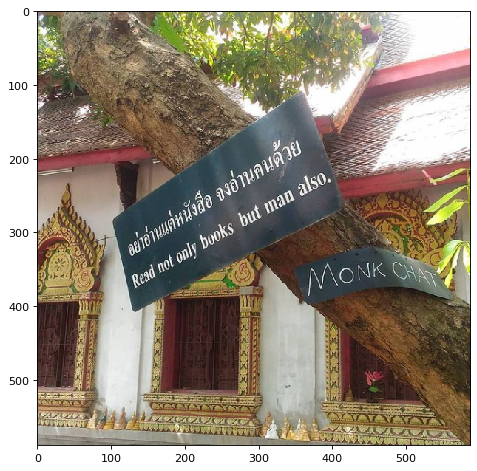

In [4]:
sign = imread('words_of_wisdom.png')
plt.figure(num=None, figsize=(8, 6), dpi=80)
imshow(sign)

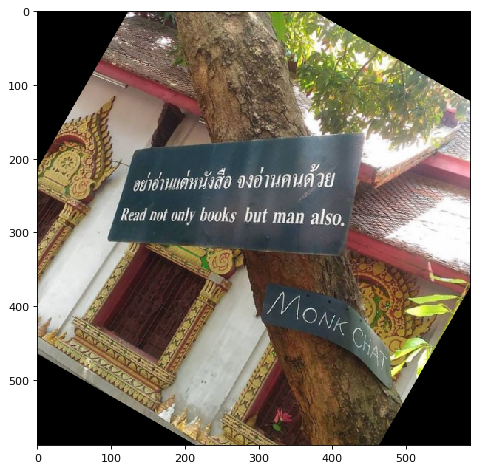

In [5]:
sign_rotate = transform.rotate(sign, 330)
plt.figure(num=None, figsize=(8, 6), dpi=80)
imshow(sign_rotate)

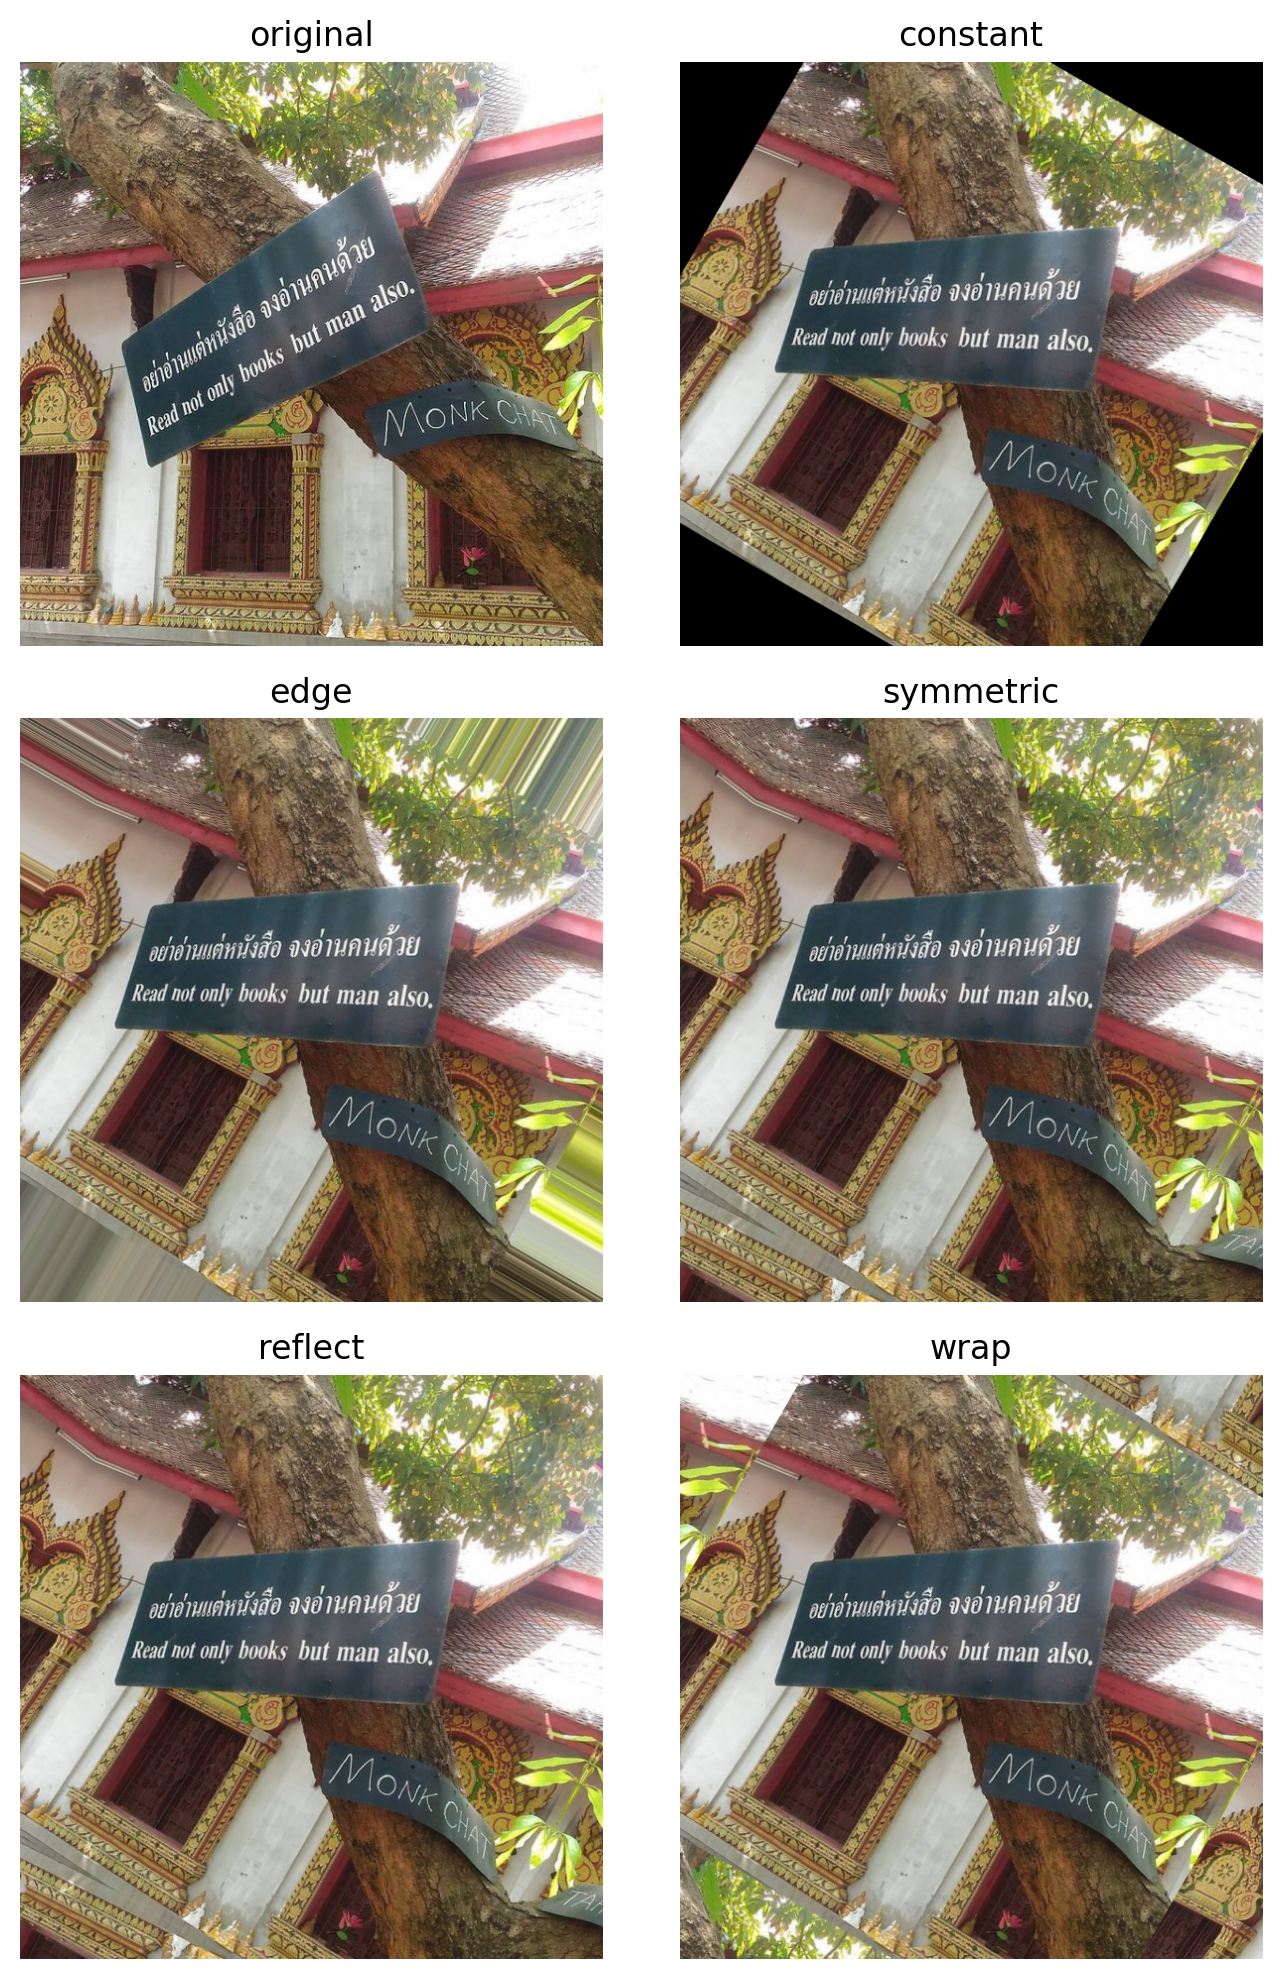

In [6]:
def rotate_fills(image):
    modes = ['constant', 'edge','symmetric','reflect','wrap']
    fig, ax = plt.subplots(3,2, figsize=(7, 10), dpi = 200)
    for n, ax in enumerate(ax.flatten()):
        n = n-1
        if n == -1:
            ax.set_title(f'original', fontsize = 12)
            ax.imshow(image)
            ax.set_axis_off()
        else: 
            ax.set_title(f'{modes[n]}', fontsize = 12)
            ax.imshow(transform.rotate(image, 330, mode = modes[n]))
            ax.set_axis_off()
        
    fig.tight_layout();
rotate_fills(sign)

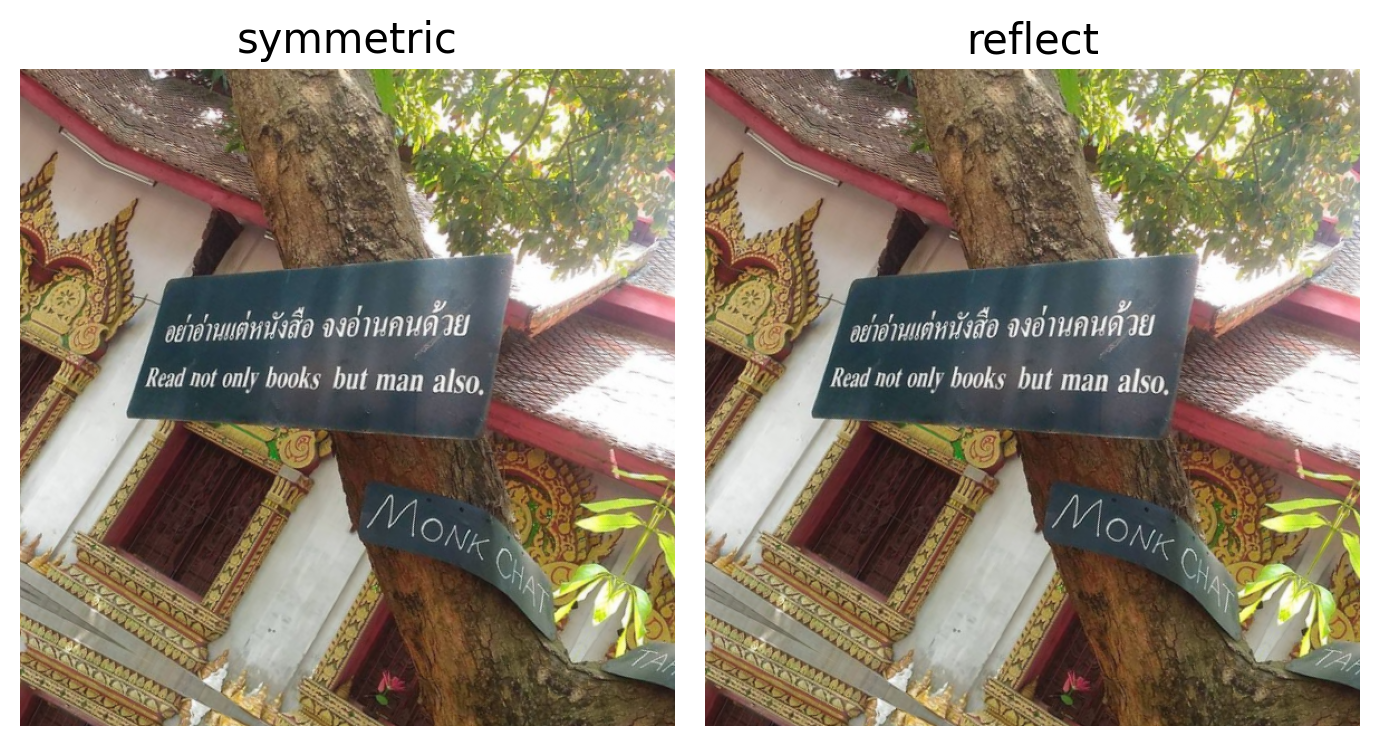

In [7]:
def comparing_fills(image):
    modes = ['symmetric','reflect']
    fig, ax = plt.subplots(1,2, figsize=(7, 10), dpi = 200)
    ax[0].imshow(transform.rotate(image, 330, mode = modes[0]))
    ax[0].set_title(f'{modes[0]}', fontsize = 15)
    ax[0].set_axis_off()
    
    ax[1].imshow(transform.rotate(image, 330, mode = modes[1]))
    ax[1].set_title(f'{modes[1]}', fontsize = 15)
    ax[1].set_axis_off()
        
    fig.tight_layout();
    
comparing_fills(sign)

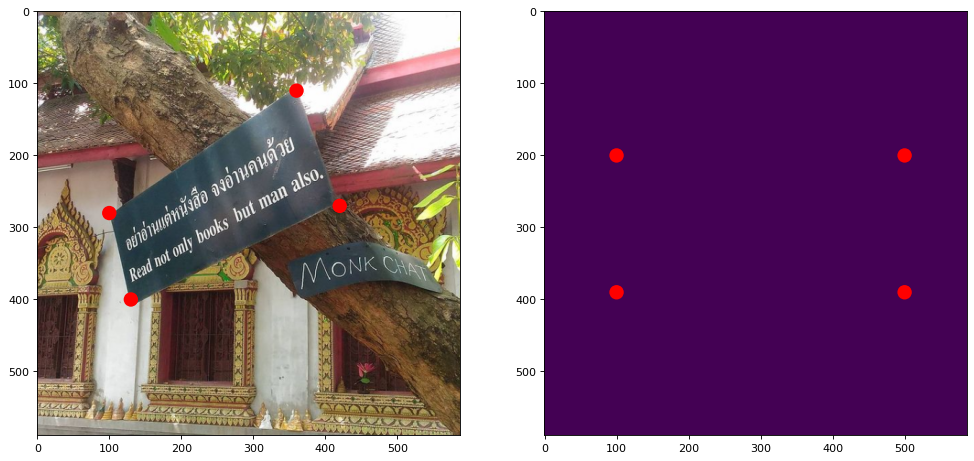

In [8]:
points_of_interest =[[360, 110], 
                     [420, 270], 
                     [130, 400], 
                     [100, 280]]
projection = [[500, 200],
              [500, 390],
              [100, 390],
              [100, 200]]
color = 'red'
fig, ax = plt.subplots(1,2, figsize=(15, 10), dpi = 80)
patch1 = Circle((points_of_interest[0][0],points_of_interest[0][1]),
                 10, facecolor = color)
patch2 = Circle((points_of_interest[1][0],points_of_interest[1][1]), 
                 10, facecolor = color)
patch3 = Circle((points_of_interest[2][0],points_of_interest[2][1]),
                 10, facecolor = color)
patch4 = Circle((points_of_interest[3][0],points_of_interest[3][1]), 
                 10, facecolor = color)
patch5 = Circle((projection[0][0],projection[0][1]), 10, 
                 facecolor = color)
patch6 = Circle((projection[1][0],projection[1][1]), 10, 
                 facecolor = color)
patch7 = Circle((projection[2][0],projection[2][1]), 10, 
                 facecolor = color)
patch8 = Circle((projection[3][0],projection[3][1]), 10, 
                 facecolor = color)
ax[0].add_patch(patch1)
ax[0].add_patch(patch2)
ax[0].add_patch(patch3)
ax[0].add_patch(patch4)
ax[0].imshow(sign);
ax[1].add_patch(patch5)
ax[1].add_patch(patch6)
ax[1].add_patch(patch7)
ax[1].add_patch(patch8)
ax[1].imshow(np.ones((sign.shape[0], sign.shape[1])))

<Figure size 640x480 with 0 Axes>

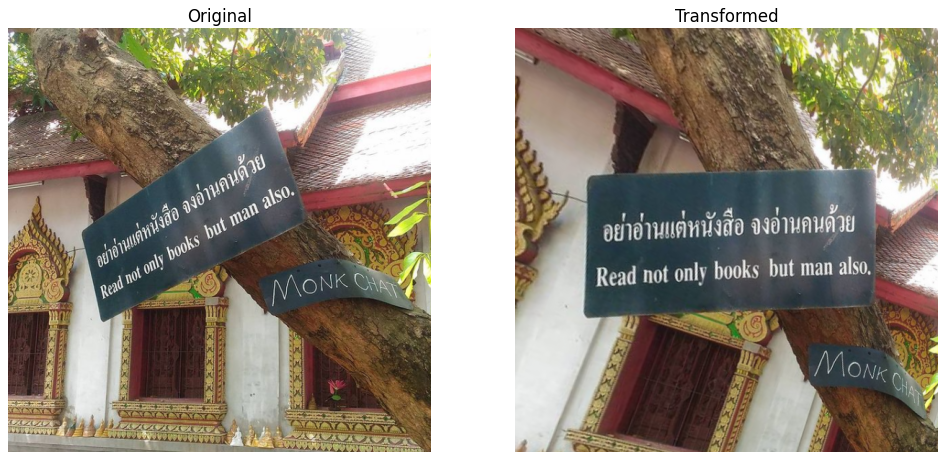

In [9]:
points_of_interest = np.array([[360, 110], 
                               [420, 270], 
                               [130, 400], 
                               [100, 280]])
projection = np.array([[500, 200],
                       [500, 390],
                       [100, 390],
                       [100, 200]])
tform = transform.estimate_transform('projective', points_of_interest, projection)
tf_img_warp = transform.warp(sign, tform.inverse, mode = 'symmetric')
plt.figure(num=None, figsize=(8, 6), dpi=80)
fig, ax = plt.subplots(1,2, figsize=(15, 10), dpi = 80)
ax[0].set_title(f'Original', fontsize = 15)
ax[0].imshow(sign)
ax[0].set_axis_off();
ax[1].set_title(f'Transformed', fontsize = 15)
ax[1].imshow(tf_img_warp)
ax[1].set_axis_off()

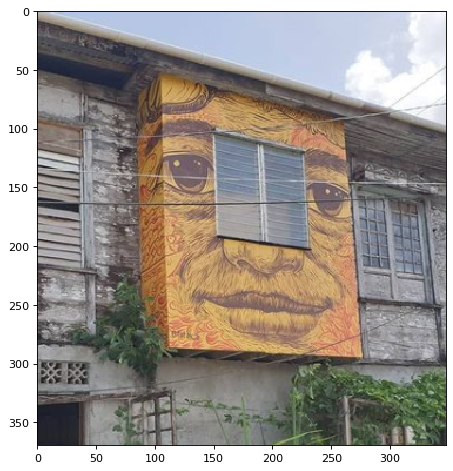

In [10]:
house = imread('artsy_house.png')
plt.figure(num=None, figsize=(8, 6), dpi=80)
imshow(house)

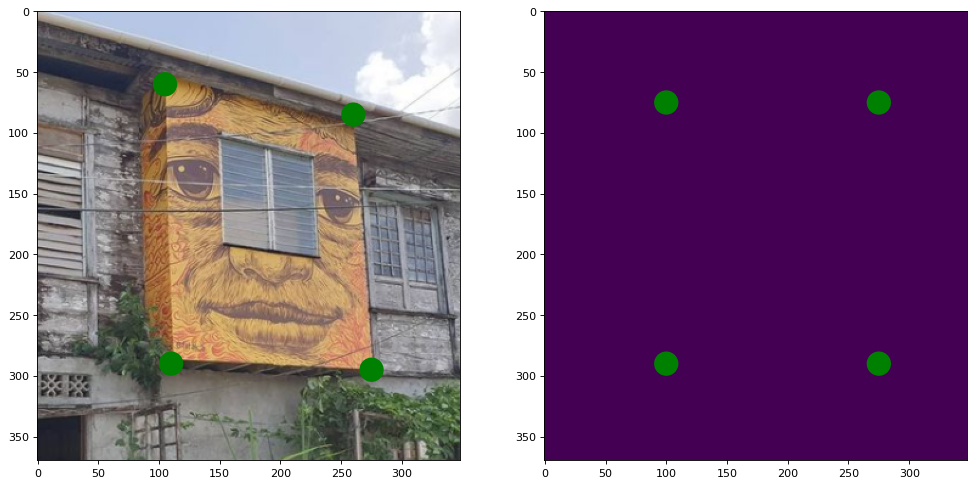

In [11]:
points_of_interest =[[105, 60], 
                     [260, 85], 
                     [275, 295], 
                     [110, 290]]
projection = [[100, 75],
              [275, 75],
              [275, 290],
              [100, 290]]
color = 'green'
patches = []
fig, ax = plt.subplots(1,2, figsize=(15, 10), dpi = 80)
for coordinates in (points_of_interest + projection):
    patch = Circle((coordinates[0],coordinates[1]), 10, 
                    facecolor = color)
    patches.append(patch)
for p in patches[:4]:
    ax[0].add_patch(p)
ax[0].imshow(house);
for p in patches[4:]:
    ax[1].add_patch(p)
ax[1].imshow(np.ones((house.shape[0], house.shape[1])))

<Figure size 640x480 with 0 Axes>

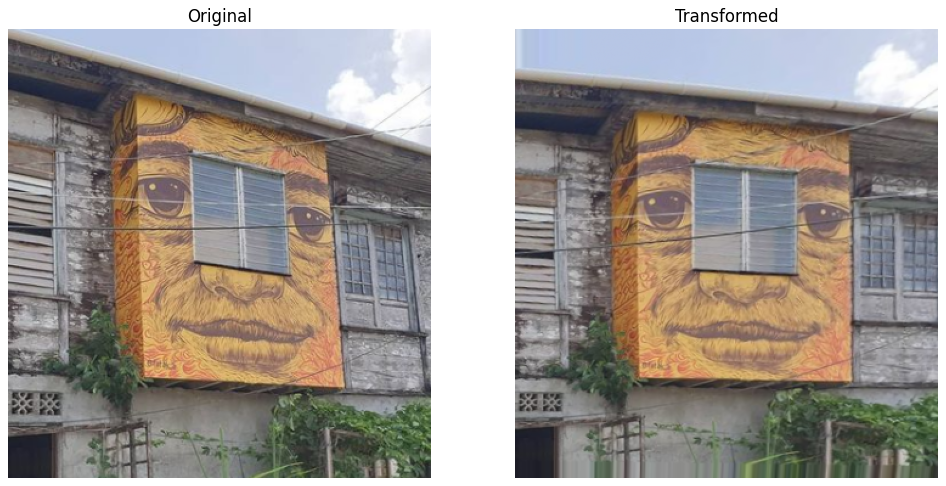

In [12]:
points_of_interest = np.array(points_of_interest)
projection = np.array(projection)
tform = transform.estimate_transform('projective', points_of_interest, projection)
tf_img_warp = transform.warp(house, tform.inverse, mode = 'edge')
plt.figure(num=None, figsize=(8, 6), dpi=80)
fig, ax = plt.subplots(1,2, figsize=(15, 10), dpi = 80)
ax[0].set_title(f'Original', fontsize = 15)
ax[0].imshow(house)
ax[0].set_axis_off();
ax[1].set_title(f'Transformed', fontsize = 15)
ax[1].imshow(tf_img_warp)
ax[1].set_axis_off()